In [86]:
# Importamos las librerias
import fastf1 as f1
import fastf1.plotting
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [87]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [88]:
# Cargamos los datos del SAUDI ARABIAN GRAND PRIX 2024
sesion = f1.get_session(2024, 2, 'R')

In [89]:
# Sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.event.OfficialEventName)
print(sesion.date)

Race
FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024
2024-03-09 17:00:00


In [90]:
# Cargamos la informacion de la carrera
sesion.load()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']


In [91]:
sesion.results[['Position', 'BroadcastName', 'Abbreviation', 'TeamName', 'CountryCode', 'Status', 'Points']]

,Position,BroadcastName,Abbreviation,TeamName,CountryCode,Status,Points
1,1.0,M VERSTAPPEN,VER,Red Bull Racing,NED,Finished,25.0
11,2.0,S PEREZ,PER,Red Bull Racing,MEX,Finished,18.0
16,3.0,C LECLERC,LEC,Ferrari,MON,Finished,16.0
81,4.0,O PIASTRI,PIA,McLaren,AUS,Finished,12.0
14,5.0,F ALONSO,ALO,Aston Martin,ESP,Finished,10.0
63,6.0,G RUSSELL,RUS,Mercedes,GBR,Finished,8.0
38,7.0,O BEARMAN,BEA,Ferrari,GBR,Finished,6.0
4,8.0,L NORRIS,NOR,McLaren,GBR,Finished,4.0
44,9.0,L HAMILTON,HAM,Mercedes,GBR,Finished,2.0
27,10.0,N HULKENBERG,HUL,Haas F1 Team,GER,Finished,1.0


## Ritmo de carrera de los equipos

In [92]:
# Vueltas de cada piloto
vueltas = sesion.laps.pick_quicklaps()

In [93]:
transform_vueltas = vueltas.copy()
transform_vueltas.loc[:, "LapTime (s)"] = vueltas["LapTime"].dt.total_seconds()

# Ordenamos los equipos segun la media de tiempo, desde el mas rapido al mas lento
equipos = (
    transform_vueltas[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# Asociamos los equipos con colores
team_palette = {team: f1.plotting.get_team_color(team, session=sesion)
                for team in equipos}

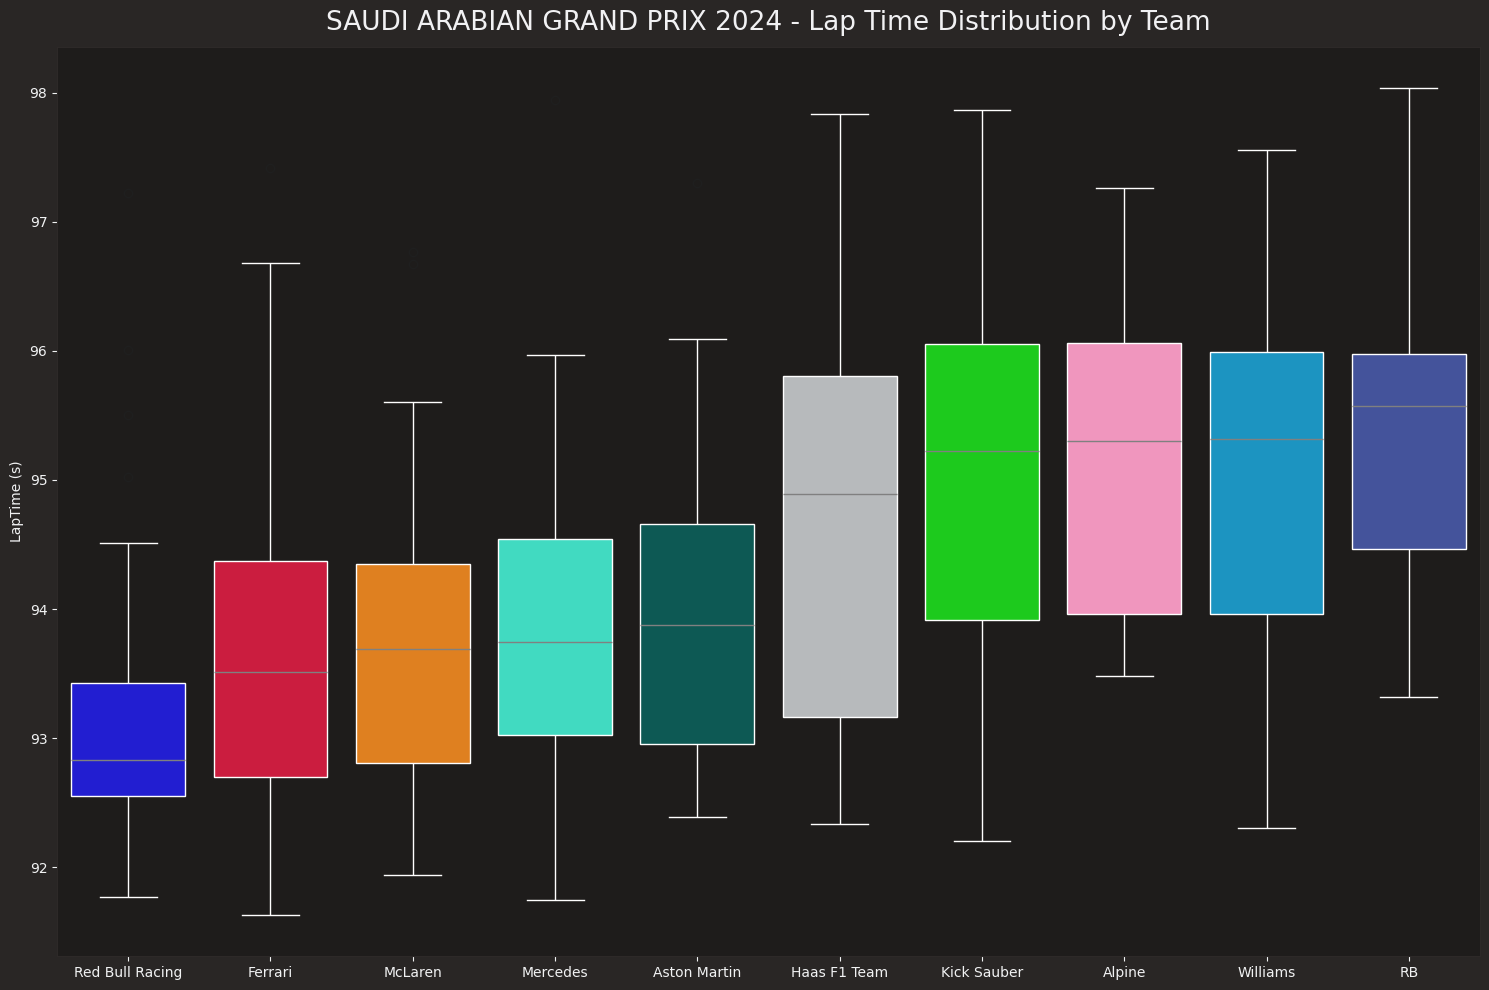

In [94]:
# Boxplots comparativos de ritmo de carrera entre los distintos equipos
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transform_vueltas[["Team", "LapTime (s)"]],
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=equipos,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("SAUDI ARABIAN GRAND PRIX 2024 - Lap Time Distribution by Team")
plt.grid(visible=False)
ax.set(xlabel=None)

# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/Lap_time_distribution_teams.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Ritmo de carrera de cada piloto

In [95]:
# Seleccionamos a los pilotos
pilotos = sesion.drivers
pilotos_laps = sesion.laps.pick_drivers(pilotos).pick_quicklaps()
pilotos_laps = pilotos_laps.reset_index()

posicines_finales = [sesion.get_driver(i)["Abbreviation"] for i in pilotos]
print(posicines_finales)

['VER', 'PER', 'LEC', 'PIA', 'ALO', 'RUS', 'BEA', 'NOR', 'HAM', 'HUL', 'ALB', 'MAG', 'OCO', 'SAR', 'TSU', 'RIC', 'BOT', 'ZHO', 'STR', 'GAS']


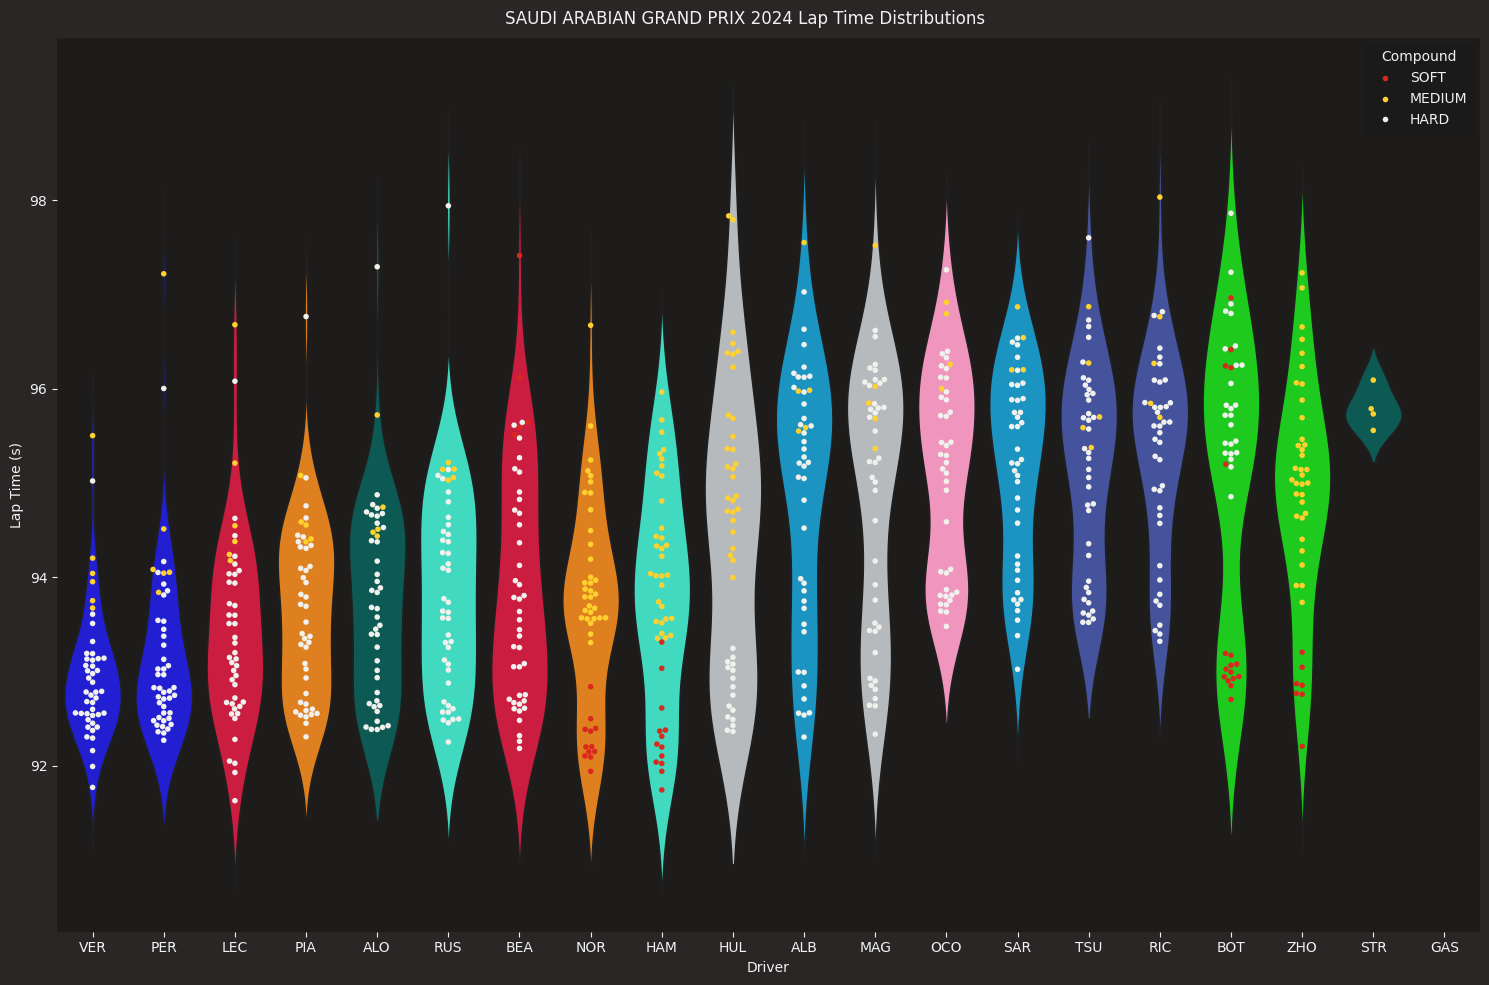

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))

# Convertimos los tiempos de vuelta a segundos
pilotos_laps["LapTime(s)"] = pilotos_laps["LapTime"].dt.total_seconds()

# Grafico de violines y swarmplot
sns.violinplot(data=pilotos_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=posicines_finales,
               palette=fastf1.plotting.get_driver_color_mapping(session=sesion)
               )

sns.swarmplot(data=pilotos_laps,
              x="Driver",
              y="LapTime(s)",
              order=posicines_finales,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=sesion),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

# Configuracion del grafico
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("SAUDI ARABIAN GRAND PRIX 2024 Lap Time Distributions")
sns.despine(left=True, bottom=True)

# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/Lap_time_distribution_drivers.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

### Ritmo de carrera ordenado según posiciones finales

C:\Users\Laura\AppData\Local\Temp\ipykernel_10684\1686828067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


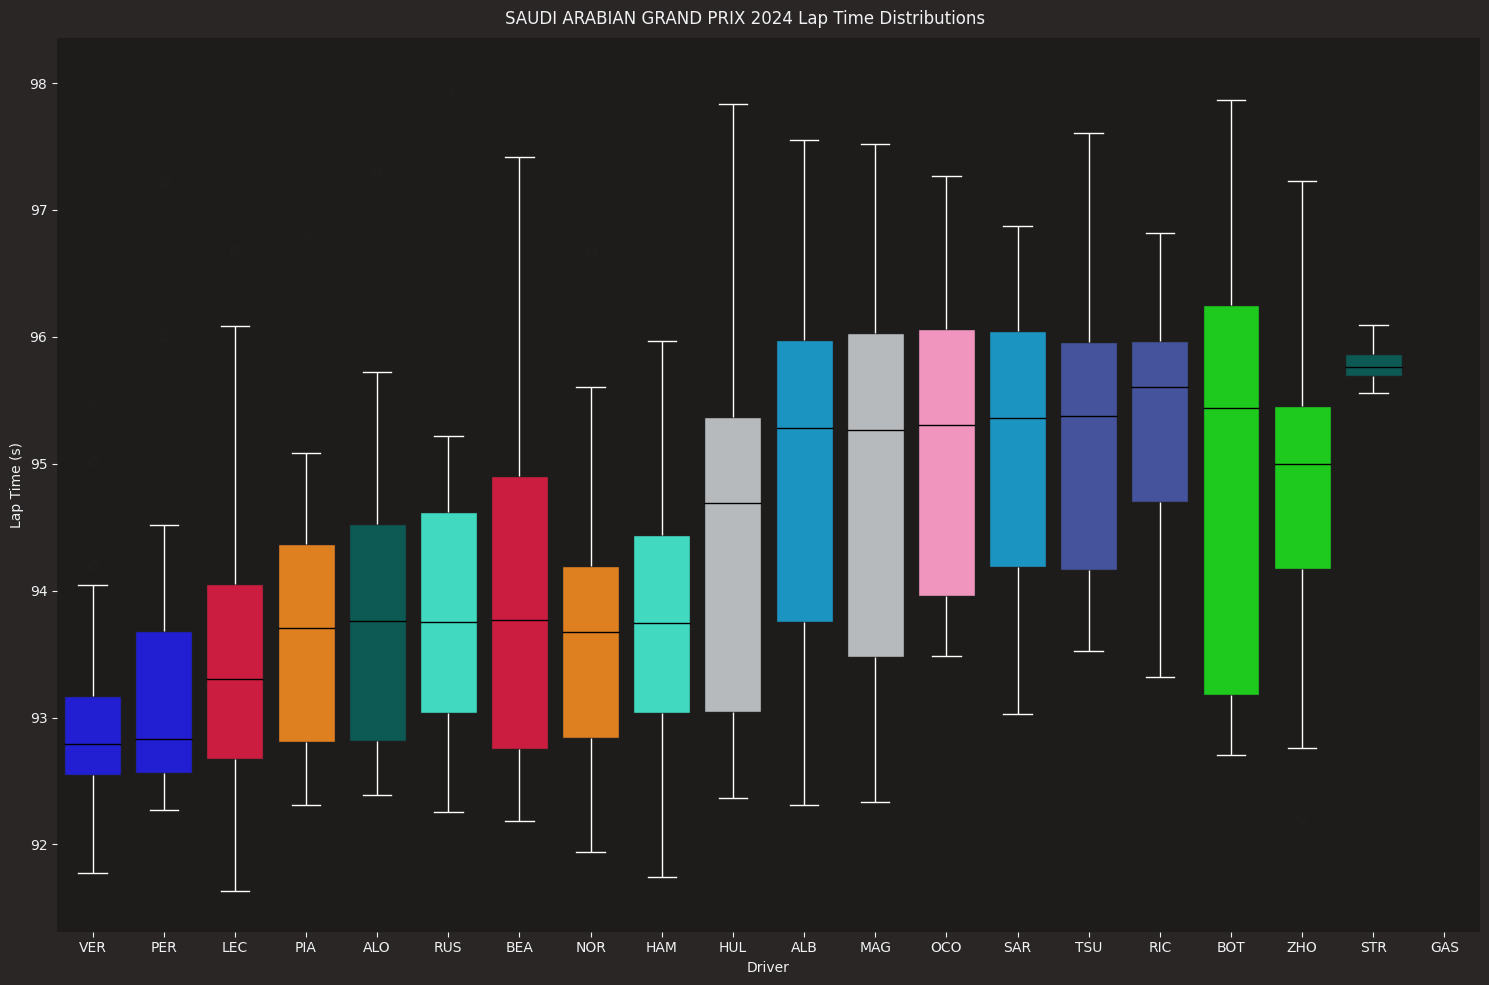

In [97]:
fig, ax = plt.subplots(figsize=(15, 10))

# Boxplot comparativo de ritmo de carrera entre los distintos pilotos
sns.boxplot(
    data=pilotos_laps,
    x="Driver",
    y="LapTime(s)",
    order=posicines_finales,
    palette=fastf1.plotting.get_driver_color_mapping(session=sesion),
    whiskerprops=dict(color="white"),
    medianprops=dict(color="black"),
    capprops=dict(color="white"),
)

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("SAUDI ARABIAN GRAND PRIX 2024 Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.grid(visible=False)
# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/Lap_time_distribution_drivers_boxplots.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

### Ritmo de carrera ordenado según media de tiempo de vuelta

C:\Users\Laura\AppData\Local\Temp\ipykernel_10684\307394884.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


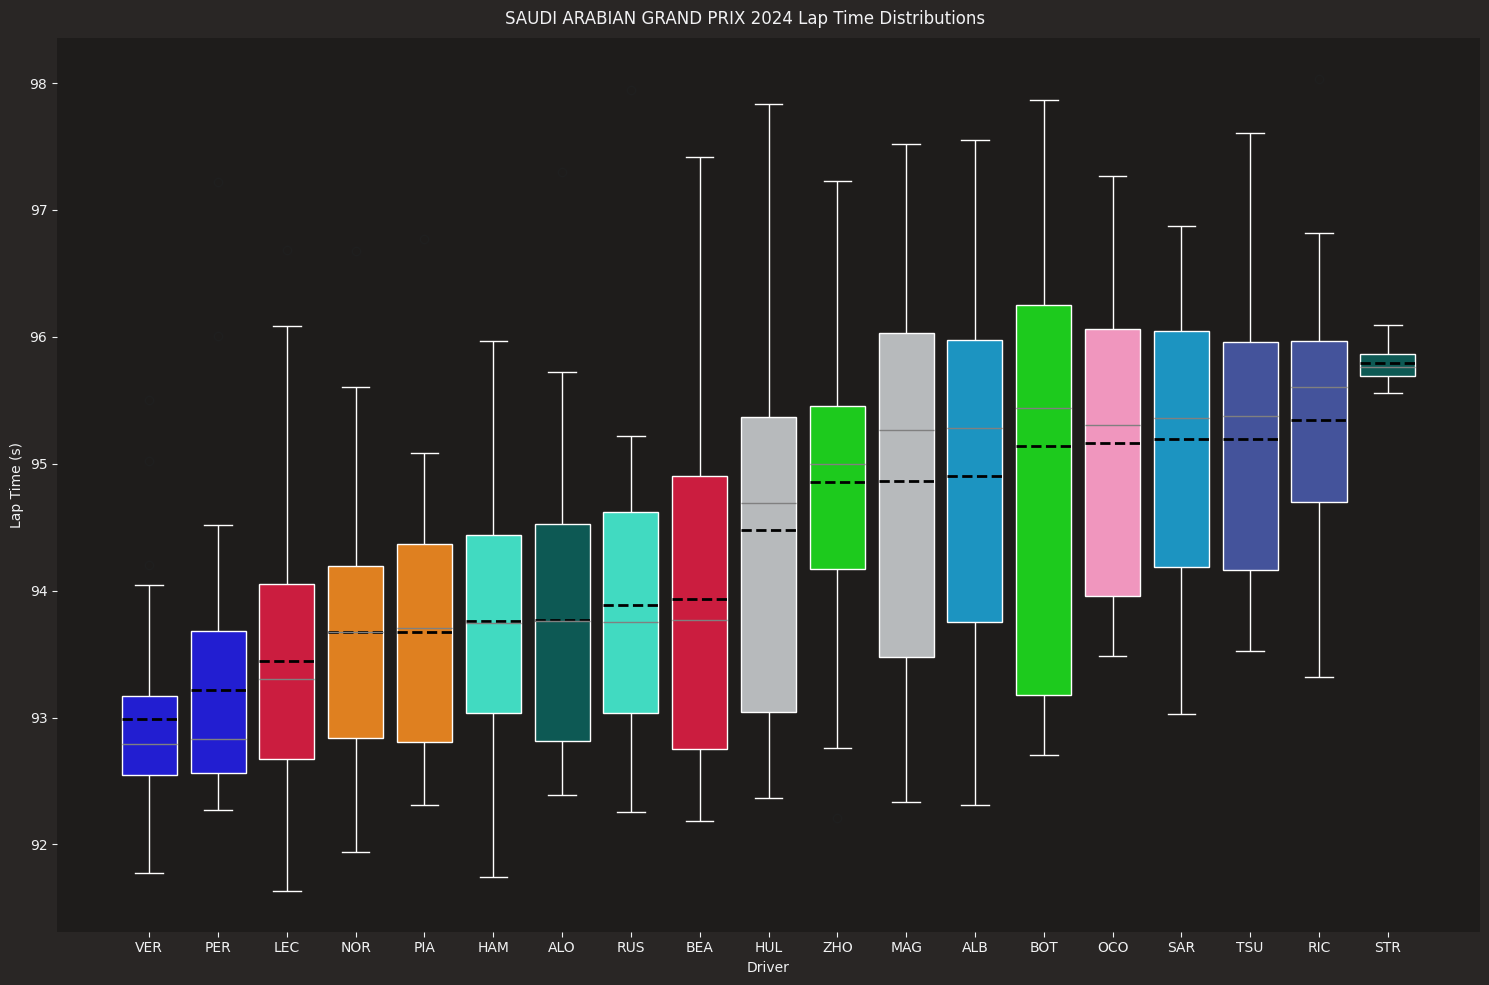

In [98]:
# Calculamos la media de tiempo de vuelta para cada piloto
media_tiempos = pilotos_laps.groupby('Driver')['LapTime(s)'].mean().sort_values()

# Ordenamos los pilotos según la media de tiempo de vuelta
orden_pilotos = media_tiempos.index

# Creamos el boxplot comparativo de ritmo de carrera entre los distintos pilotos
fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(
    data=pilotos_laps,
    x="Driver",
    y="LapTime(s)",
    order=orden_pilotos,
    palette=fastf1.plotting.get_driver_color_mapping(session=sesion),
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
    ax=ax,
)

# Líneas discontinuas
for i, piloto in enumerate(orden_pilotos):
    media = media_tiempos[piloto]
    ax.plot(
        [i - 0.4, i + 0.4],  
        [media, media],       
        color='black',          
        linestyle='--',       
        linewidth=2,
    )

# Etiquetas
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("SAUDI ARABIAN GRAND PRIX 2024 Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.grid(visible=False)
# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/Lap_time_distribution_drivers_boxplot_ordered.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Cambios de posición de los pilotos en cada vuelta

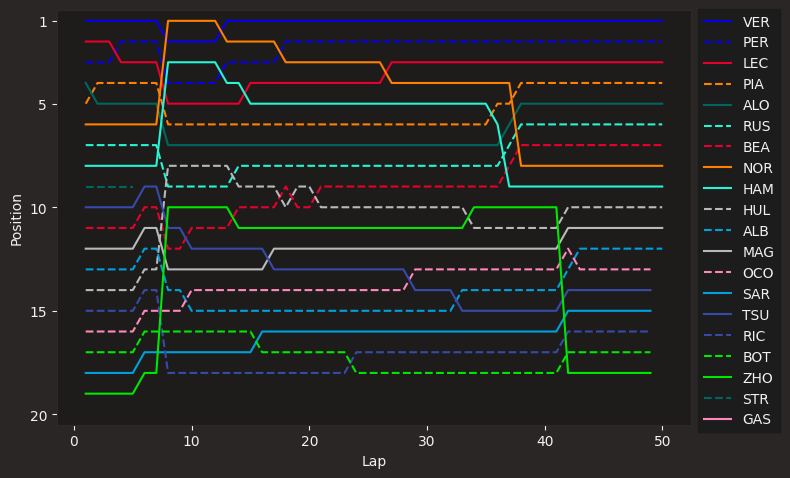

In [99]:
fig, ax = plt.subplots(figsize=(8, 4.9))

# Extraemos los datos de la posición de cada piloto en cada vuelta
for piloto in sesion.drivers:
    piloto_laps = sesion.laps.pick_driver(piloto)
    abb = piloto_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=sesion)
    ax.plot(piloto_laps['LapNumber'], piloto_laps['Position'],
            label=abb, **style)

# Configuración del gráfico 
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

# Leyenda
ax.legend(bbox_to_anchor=(1.0, 1.02))

# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/changes_positions.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

### Campeonato de pilotos

In [100]:
# Datos carrera baréin
sesion_primera_carrera = f1.get_session(2024, 1, 'R')
sesion_primera_carrera.load()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']


In [101]:
# Resultados de la primera carrera
resultados_primera_carrera = sesion_primera_carrera.results[['Abbreviation', 'Points']]

# Resultados de la segunda carrera
resultados_segunda_carrera = sesion.results[['Abbreviation', 'Points']]

# Sumar los puntos de ambas carreras
puntos_totales = pd.merge(resultados_primera_carrera, resultados_segunda_carrera, on='Abbreviation', suffixes=('_primera', '_segunda'), how='outer')
puntos_totales.fillna(0, inplace=True)

# Calcular los puntos totales
puntos_totales['Puntos Totales'] = puntos_totales['Points_primera'] + puntos_totales['Points_segunda']
puntos_totales = puntos_totales[puntos_totales['Puntos Totales'] > 0]

In [102]:
# DataFrame con los puntos de ambas carreras
puntos_evolucion = pd.DataFrame({
    'Piloto': puntos_totales['Abbreviation'],
    'BHARAIN': puntos_totales['Points_primera'],
    'SAUDI ARABIA': puntos_totales['Puntos Totales']
})

# Añadir la columna equipo 
puntos_evolucion['Equipo'] = puntos_evolucion['Piloto'].map(lambda x: sesion.get_driver(x)['TeamName'] if x in sesion.results['Abbreviation'].values else 'Unknown')

# SAI sea rojo Ferrari
if 'SAI' in puntos_evolucion['Piloto'].values:
    team_palette['SAI'] = '#e8002d'

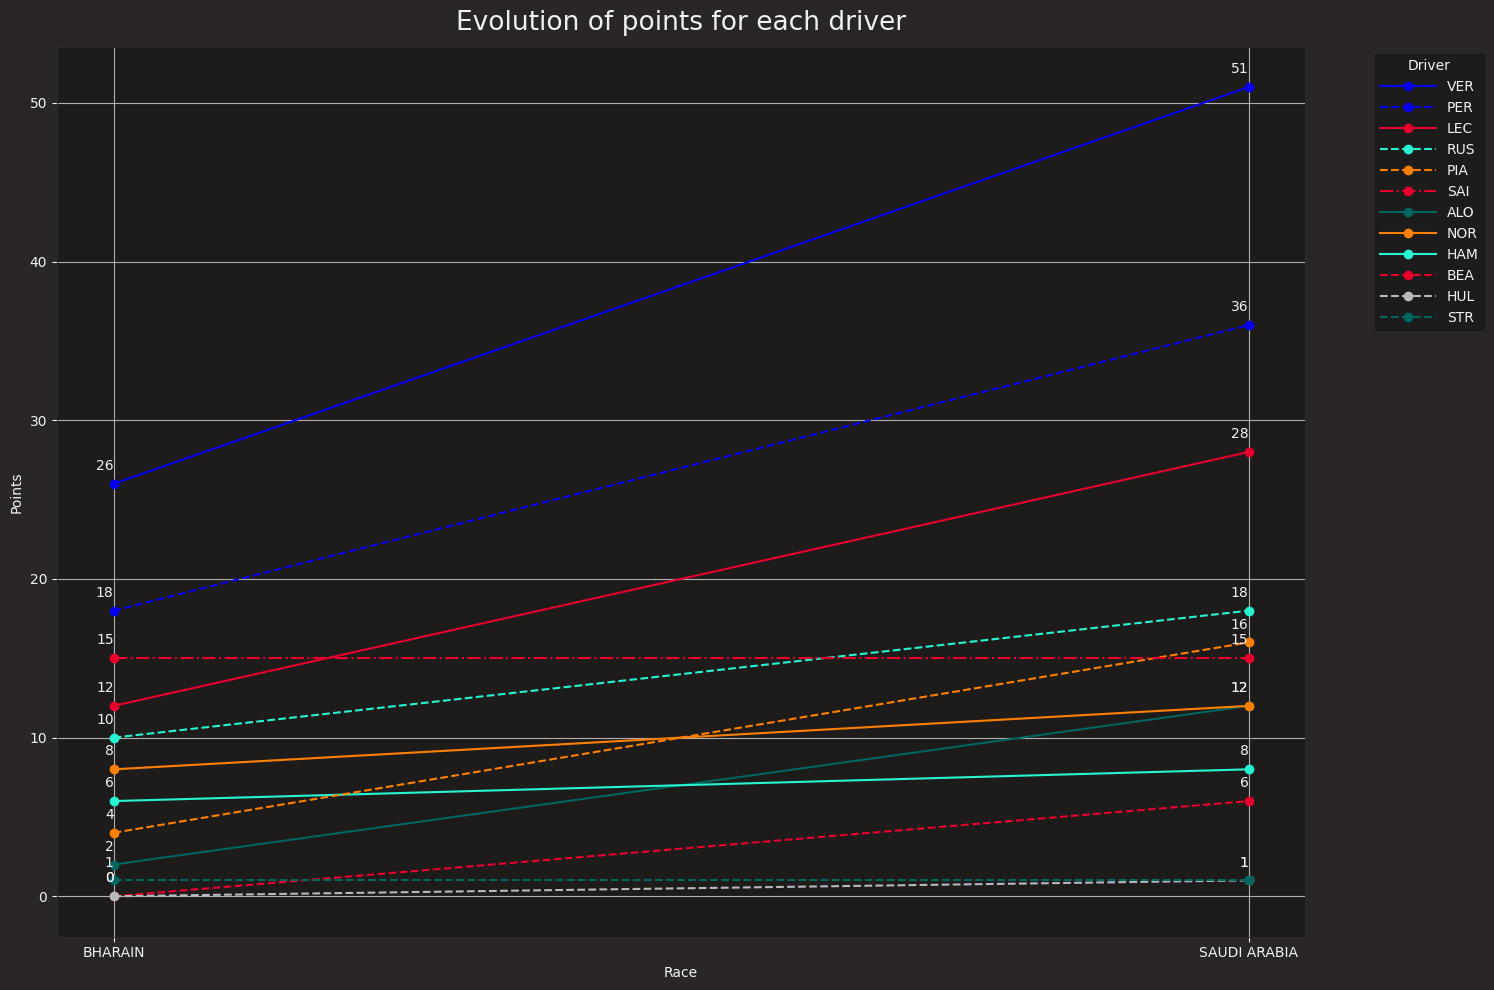

<Figure size 640x480 with 0 Axes>

In [103]:
fig, ax = plt.subplots(figsize=(15, 10))

# Graficar la evolución de los puntos para cada piloto
for i, row in puntos_evolucion.iterrows():
    color = team_palette.get(row['Equipo'], 'grey')
    if row['Piloto'] == 'SAI':
        color = '#e8002d'  # Rojo Ferrari
    try:
        style = fastf1.plotting.get_driver_style(identifier=row['Piloto'],
                                                 style=['color', 'linestyle'],
                                                 session=sesion)
        ax.plot(['BHARAIN', 'SAUDI ARABIA'], [row['BHARAIN'], row['SAUDI ARABIA']], marker='o', label=row['Piloto'], color=style['color'], linestyle=style['linestyle'])
    except KeyError:
        ax.plot(['BHARAIN', 'SAUDI ARABIA'], [row['BHARAIN'], row['SAUDI ARABIA']], marker='o', label=row['Piloto'], color=color, linestyle='-.')

    # Añadir cantidad de puntos
    ax.annotate(f"{row['BHARAIN']:.0f}", ('BHARAIN', row['BHARAIN']), textcoords="offset points", xytext=(0,10), ha='right')
    ax.annotate(f"{row['SAUDI ARABIA']:.0f}", ('SAUDI ARABIA', row['SAUDI ARABIA']), textcoords="offset points", xytext=(0,10), ha='right')

# Configuración del gráfico
ax.set_xlabel('Race')
ax.set_ylabel('Points')
plt.title('Evolution of points for each driver')

# Leyenda
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: puntos_totales[puntos_totales['Abbreviation'] == x[1]]['Puntos Totales'].values[0], reverse=True)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)
ax.legend(sorted_handles, sorted_labels, title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left', handlelength=4)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/points_evolution.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Campeonato de equipos

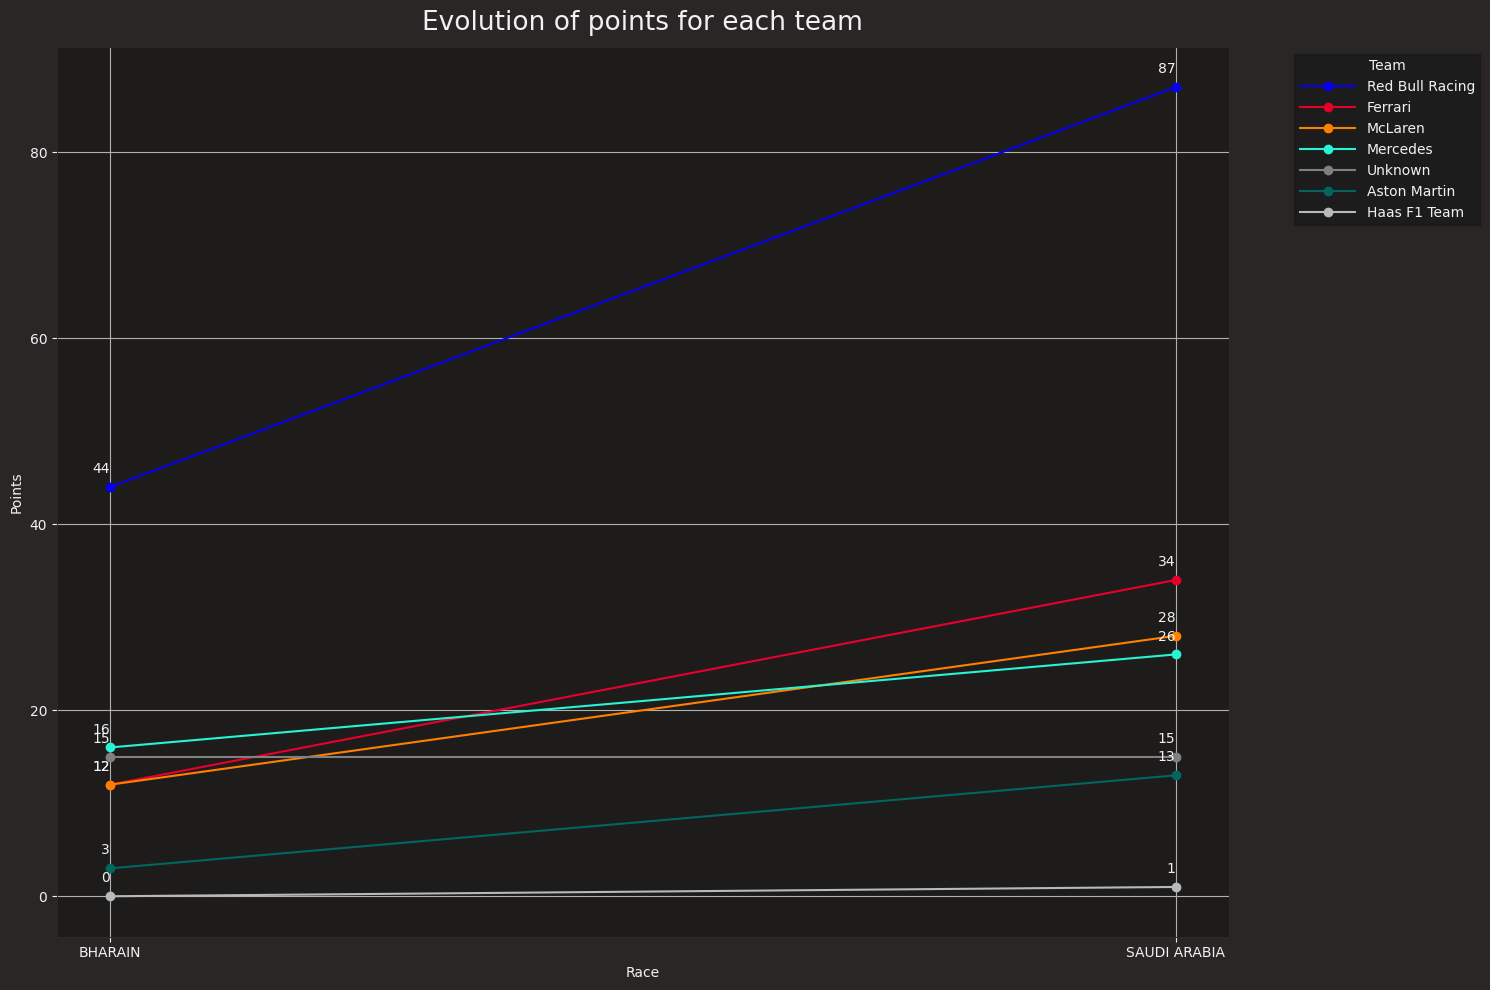

<Figure size 640x480 with 0 Axes>

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))

# Agrupar por equipo
puntos_equipos = puntos_evolucion.groupby('Equipo').sum()[['BHARAIN', 'SAUDI ARABIA']]

# Graficar la evolución de los puntos para cada equipo
for equipo, row in puntos_equipos.iterrows():
    color = team_palette.get(equipo, 'grey')
    ax.plot(['BHARAIN', 'SAUDI ARABIA'], [row['BHARAIN'], row['SAUDI ARABIA']], marker='o', label=equipo, color=color)
    
    ax.annotate(f"{row['BHARAIN']:.0f}", ('BHARAIN', row['BHARAIN']), textcoords="offset points", xytext=(0,10), ha='right')
    ax.annotate(f"{row['SAUDI ARABIA']:.0f}", ('SAUDI ARABIA', row['SAUDI ARABIA']), textcoords="offset points", xytext=(0,10), ha='right')

# Configuración del gráfico
ax.set_xlabel('Race')
ax.set_ylabel('Points')
plt.title('Evolution of points for each team')

# Leyenda
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: puntos_equipos.loc[x[1], 'SAUDI ARABIA'], reverse=True)
sorted_handles, sorted_labels = zip(*sorted_handles_labels)
ax.legend(sorted_handles, sorted_labels, title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', handlelength=4)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/02_SAUDI ARABIA/graphics/points_evolution_teams.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()